## Follow-up Investigation of Fandango Movie Rating Bias

A previous analysis was conducted by Walt Hickey looking at a bias that seemed apparent with movie ratings on Fandango.com. He concluded that Fandango appeared to skew movie ratings higher than the actual ratings.

Our intention is to review new data and determine if this bias still exists or has been corrected.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
fsc = pd.read_csv('fandango_score_comparison.csv')
mr = pd.read_csv('movie_ratings_16_17.csv')

In [3]:
fsc.describe

<bound method DataFrame.describe of                                                FILM  RottenTomatoes  \
0                    Avengers: Age of Ultron (2015)              74   
1                                 Cinderella (2015)              85   
2                                    Ant-Man (2015)              80   
3                            Do You Believe? (2015)              18   
4                     Hot Tub Time Machine 2 (2015)              14   
5                          The Water Diviner (2015)              63   
6                             Irrational Man (2015)              42   
7                                   Top Five (2014)              86   
8                      Shaun the Sheep Movie (2015)              99   
9                               Love & Mercy (2015)              89   
10                Far From The Madding Crowd (2015)              84   
11                                 Black Sea (2015)              82   
12                                 Leviat

In [4]:
fsc.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [5]:
mr.describe

<bound method DataFrame.describe of                                   movie  year  metascore  imdb  tmeter  \
0                   10 Cloverfield Lane  2016         76   7.2      90   
1                              13 Hours  2016         48   7.3      50   
2                   A Cure for Wellness  2016         47   6.6      40   
3                       A Dog's Purpose  2017         43   5.2      33   
4               A Hologram for the King  2016         58   6.1      70   
5                       A Monster Calls  2016         76   7.5      87   
6                A Street Cat Named Bob  2016         54   7.4      77   
7       Alice Through the Looking Glass  2016         34   6.2      30   
8                                Allied  2016         60   7.1      61   
9                         Amateur Night  2016         38   5.0       0   
10                           Anthropoid  2016         59   7.2      66   
11              Approaching the Unknown  2016         53   4.8      45   
12

In [6]:
mr.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [7]:
mr_simp = mr[['movie','year','fandango']].copy()
fsc_simp = fsc[['FILM','Fandango_Stars','Fandango_Ratingvalue','Fandango_votes','Fandango_Difference']].copy()
print(fsc_simp.head())
print(mr_simp.head())

                             FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   
3          Do You Believe? (2015)             5.0                   4.5   
4   Hot Tub Time Machine 2 (2015)             3.5                   3.0   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5  
3            1793                  0.5  
4            1021                  0.5  
                     movie  year  fandango
0      10 Cloverfield Lane  2016       3.5
1                 13 Hours  2016       4.5
2      A Cure for Wellness  2016       3.0
3          A Dog's Purpose  2017       4.5
4  A Hologram for the King  2016       3.0


### What is our population?

Our population the ratings of movies listed on the site.

Initial review tells us we have what we want: a dataset from before the review and another dataset that occurred after that time. However, closer review of the sampling criteria for each dataset tells us something different.

The older dataset had some specific criteria for what it collected:

1. The rating required at least 30 reviews.
2. The data is specific to 2015

These two criteria tell us that the sampling was not done randomly. For this reason, we can't say that our sample will be representative of the population.

The newer dataset had two criteria as well:

1. A significant number of votes for each movie
2. The data is from 2016 and later

The issue with this dataset is that we can't tell whether ratings were just different between 2015 and 2016+. Each year could have just been better or worse for movie ratings. Also, we have the same issue of limiting to movies with a large umber of votes.

Given the sampling that both of these made, we can't use these samples to answer the question we have about our population.

### Our new goal

Given that we have two datasets both focused on popular movies and we have relative ratings from multiple matching sites in each dataset. Let us instead look at whether Fandango's ratings have changed from prior to after in relation to other sites. In other words, was Fandango's rating drastically different from ratings on other sites in 2015. Since the article was released, has this changed so that their rating matches the ratings of the other sites for popular movies.

While the goal proposed could probably be collected, for purposes of this exercise, we will match the goal provided by Dataquest. We will instead focus on Fandango's popular movie ratings from 2015 and later to determine if the ratings for popular movies changed from 2015 to 2016.

### What is popular?

The first dataset is more precise, defining a popular movie as one with 30 or more ratings. For this reason, we will define popular in the second set with the same metric.

In [8]:
fsc_simp['Fandango_votes'].value_counts().sort_index()

35       1
36       1
38       2
41       2
42       1
43       2
46       1
48       1
50       1
51       1
54       1
55       1
56       1
59       1
63       1
64       1
66       2
70       1
74       1
79       1
83       2
95       1
99       1
110      1
118      1
121      1
124      1
127      1
162      1
192      1
        ..
6288     1
6437     1
6506     1
6757     1
6835     1
7025     1
7123     1
7705     1
8055     1
8077     1
8096     1
8357     1
8381     1
9363     1
9418     1
9443     1
9749     1
10509    1
12055    1
12640    1
13055    1
14846    1
14998    1
15205    1
15337    1
15749    1
33538    1
34085    1
34390    1
34846    1
Name: Fandango_votes, Length: 140, dtype: int64

The first set clearly sticks to the criteria of 30 or more fan ratings. However, we don't know for the second dataset what is defined as a popular movie. Let us take a random sample of 10 movies from the dataset and determine the frequency of ratings in order to see whether all movies meet the criteria we want. Ideally, we want 8 out of the 10 samples to be above the 30 rating count.

In [9]:
mr_simp.sample(n=10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


From this set, we have 9/10 that meet our criteria. This should be sufficient for what we are looking for.

We are also specifically looking for movies that are from 2015 or 2016. We will need to isolate the movies released in those two years from our datasets.

In [10]:
fandango_2016 = mr_simp[mr_simp['year'] == 2016]
fandango_2016.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


In [13]:
fsc_simp['Year'] = fsc_simp['FILM'].str[-5:-1]
fandango_2015 = fsc_simp[fsc_simp['Year'] == '2015']
fandango_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


### Comparison of our two datasets

We will start by comparing kde plots for our two datasets to review the distribution of the movie ratings. Similar to Hickey's original analysis, we're looking for differences in the skew of the two curves.

([<matplotlib.axis.XTick at 0x7f97d6f9a160>,
 <a list of 11 Text xticklabel objects>)

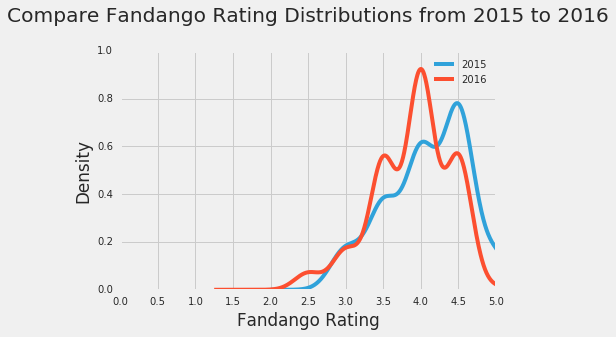

In [20]:
plt.style.use('fivethirtyeight')
fandango_2015['Fandango_Stars'].plot.kde(label='2015', legend=True)
fandango_2016['fandango'].plot.kde(label='2016', legend=True)
plt.title('Compare Fandango Rating Distributions from 2015 to 2016', y=1.1)
plt.xlabel('Fandango Rating')
plt.xlim(0,5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

Both distributions are skewed left. However, we can see that since 2015, the distribution is less skewed left. This may imply that their star ratings have become more representative of their true rating, though this could be impacted by a change in movie popularity of the population in 2016. 

In [26]:
fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [27]:
fandango_2016['fandango'].value_counts(normalize=True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

We can see that in 2015, a star rating greater than 4.0 accounted for 43%, but by 2016, this dropped to about 25%. Interestingly, it seems like overall the distribution shifted down by 0.5 stars. This is in line with Fandango's suggestion that a rounding bug accounted for the problem.

We used percentage as the datasets were different in size (thus giving us better comparison) and percentage is easier to comprehend than proportions in this case.

It's still clear that there is a difference between the distributions from 2015 to 2016.

While the percentage of the highest ratings dropped significantly, we also see the percentage of ratings on the lower also decreased from 2015 to 2016, shifting more to a middle-ground. This is opposite of our hypothesis.

In [32]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
median_2015 = fandango_2015['Fandango_Stars'].median()
mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mean_2016 = fandango_2016['fandango'].mean()
median_2016 = fandango_2016['fandango'].median()
mode_2016 = fandango_2016['fandango'].mode()[0]

summ_stats = pd.DataFrame()
summ_stats['2015'] = [mean_2015, median_2015, mode_2015]
summ_stats['2016'] = [mean_2016, median_2016, mode_2016]
summ_stats.index = ['mean','median','mode']

In [33]:
summ_stats

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


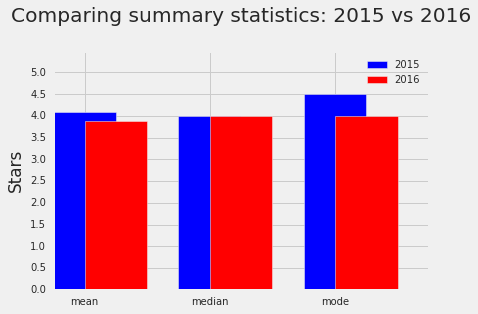

In [50]:
from numpy import arange

plt.style.use('fivethirtyeight')
summ_stats['2015'].plot.bar(label='2015', color='blue', legend=True, align='center')
summ_stats['2016'].plot.bar(label='2016', color='red', legend=True, align='edge',rot=0)

plt.title('Comparing summary statistics: 2015 vs 2016', y=1.1)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,0.5))
plt.ylabel('Stars')

What this data tells us is that the average did decrease from 2015 to 2016. However, the data seemed to just skewed closer to 4.0 stars This is indicated by the median not changing from 4.0, but the mode went from 4.5 to 4.0.

### Conclusion

We can conclude that the average Fandango star rating for popular movies went down from 2015 to 2016. While we can't be sure of the cause of this and why the lower end shifted up, it does point us in the direction that the issue with rounding that was occuring before has been resolved.